In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('Crime_Data_From_2020_To_Present_20250902.csv')
df.shape

(1004991, 28)

In [4]:
df.head(5)
df['AREA NAME'].unique()
df = df[df['LAT'] >= 34.05]
df = df[df['LAT'] <= 34.075]
df = df[df['LON'] >= -118.46]
df = df[df['LON'] <= -118.435]
print(df.shape)

(5156, 28)


In [5]:
df = df.drop(['AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Premis Cd', 'Weapon Used Cd', 'Status'], axis = 1)

In [6]:
df.duplicated(subset = 'DR_NO').sum()
df = df.drop('DR_NO', axis = 1)
df.head(5)

,Date Rptd,DATE OCC,TIME OCC,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
1951,2021 Jan 03 12:00:00 AM,2020 Dec 04 12:00:00 AM,1422,THEFT PLAIN - PETTY ($950 & UNDER),47,F,W,CONDOMINIUM/TOWNHOUSE,NaN,Invest Cont,440.0,NaN,NaN,NaN,1600 MALCOLM AV,NaN,34.0520,-118.4371
4872,2021 Jan 17 12:00:00 AM,2020 Dec 03 12:00:00 AM,1000,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",27,M,W,CONDOMINIUM/TOWNHOUSE,NaN,Invest Cont,341.0,NaN,NaN,NaN,1300 MIDVALE AV,NaN,34.0557,-118.4440
5124,2021 Jan 07 12:00:00 AM,2020 Nov 22 12:00:00 AM,500,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",19,M,W,GARAGE/CARPORT,NaN,Invest Cont,341.0,480.0,NaN,NaN,600 KELTON AV,NaN,34.0642,-118.4527
7222,2023 Jul 22 12:00:00 AM,2020 Oct 01 12:00:00 AM,1755,THEFT OF IDENTITY,25,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,354.0,NaN,NaN,NaN,800 HILGARD AV,NaN,34.0664,-118.4397
11146,2021 Jan 11 12:00:00 AM,2020 Dec 28 12:00:00 AM,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",26,F,O,PARKING UNDERGROUND/BUILDING,NaN,Invest Cont,740.0,NaN,NaN,NaN,10800 WEYBURN AV,NaN,34.0623,-118.4434


In [7]:
print(df.nunique())
df = df.drop('Crm Cd 4', axis = 1)

Date Rptd       1658
DATE OCC        1651
TIME OCC         750
Crm Cd Desc       81
Vict Age          95
Vict Sex           3
Vict Descent      14
Premis Desc       95
Weapon Desc       37
Status Desc        5
Crm Cd 1          81
Crm Cd 2          20
Crm Cd 3           1
Crm Cd 4           0
LOCATION         340
Cross Street     105
LAT              176
LON              176
dtype: int64


In [8]:
df['DATE OCC'].head()
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format = '%Y %b %d %I:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format = '%Y %b %d %I:%M:%S %p')
df.head()

,Date Rptd,DATE OCC,TIME OCC,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,LOCATION,Cross Street,LAT,LON
1951,2021-01-03,2020-12-04,1422,THEFT PLAIN - PETTY ($950 & UNDER),47,F,W,CONDOMINIUM/TOWNHOUSE,NaN,Invest Cont,440.0,NaN,NaN,1600 MALCOLM AV,NaN,34.0520,-118.4371
4872,2021-01-17,2020-12-03,1000,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",27,M,W,CONDOMINIUM/TOWNHOUSE,NaN,Invest Cont,341.0,NaN,NaN,1300 MIDVALE AV,NaN,34.0557,-118.4440
5124,2021-01-07,2020-11-22,500,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",19,M,W,GARAGE/CARPORT,NaN,Invest Cont,341.0,480.0,NaN,600 KELTON AV,NaN,34.0642,-118.4527
7222,2023-07-22,2020-10-01,1755,THEFT OF IDENTITY,25,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,354.0,NaN,NaN,800 HILGARD AV,NaN,34.0664,-118.4397
11146,2021-01-11,2020-12-28,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",26,F,O,PARKING UNDERGROUND/BUILDING,NaN,Invest Cont,740.0,NaN,NaN,10800 WEYBURN AV,NaN,34.0623,-118.4434


In [9]:
df.isnull().sum()
df = df.drop(['Cross Street', 'Crm Cd 2', 'Crm Cd 3', 'Status Desc'], axis = 1)
df = df.fillna({'Vict Sex': 'X', 'Vict Descent': 'X', 'Weapon Desc': 'None', 'Premis Desc': 'None'})
df = df.replace({'Vict Descent': ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Z']}, 
                {'Vict Descent': ['Other Asian', 'Black', 'Chinese', 'Cambodian', 'Filipino', 'Guamanian', 'Hispanic/Latin/Mexican', 'American Indian/Alaskan Native', 'Japanese', 'Korean', 'Laotian', 'Other', 'Pacific Islander', 'Samoan', 'Hawaiian', 'Vietnamese', 'White', 'Unknown', 'Asian Indian']})
df.head(5)

,Date Rptd,DATE OCC,TIME OCC,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Crm Cd 1,LOCATION,LAT,LON
1951,2021-01-03,2020-12-04,1422,THEFT PLAIN - PETTY ($950 & UNDER),47,F,White,CONDOMINIUM/TOWNHOUSE,None,440.0,1600 MALCOLM AV,34.0520,-118.4371
4872,2021-01-17,2020-12-03,1000,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",27,M,White,CONDOMINIUM/TOWNHOUSE,None,341.0,1300 MIDVALE AV,34.0557,-118.4440
5124,2021-01-07,2020-11-22,500,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",19,M,White,GARAGE/CARPORT,None,341.0,600 KELTON AV,34.0642,-118.4527
7222,2023-07-22,2020-10-01,1755,THEFT OF IDENTITY,25,F,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,354.0,800 HILGARD AV,34.0664,-118.4397
11146,2021-01-11,2020-12-28,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",26,F,Other,PARKING UNDERGROUND/BUILDING,None,740.0,10800 WEYBURN AV,34.0623,-118.4434


In [10]:
df = df.rename(columns = {'Date Rptd': 'date_rptd', 'DATE OCC': 'date_occ', 'TIME OCC': 'time_occ', 'Crm Cd Desc': 'crime', 'Vict Age': 'vict_age', 
'Vict Sex': 'vict_sex', 'Vict Descent': 'vict_descent', 'Premis Desc': 'premise', 'Weapon Desc': 'weapon', 'Status Desc': 'status', 'Crm Cd 1': 'crime_code',
'LOCATION': 'location', 'LAT': 'lat', 'LON': 'lon'})

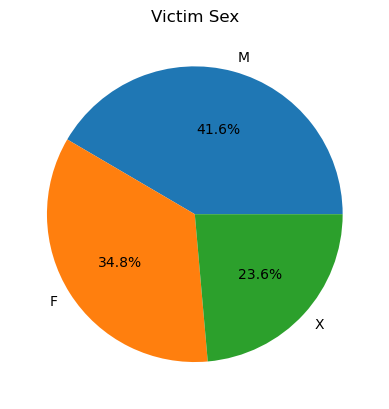

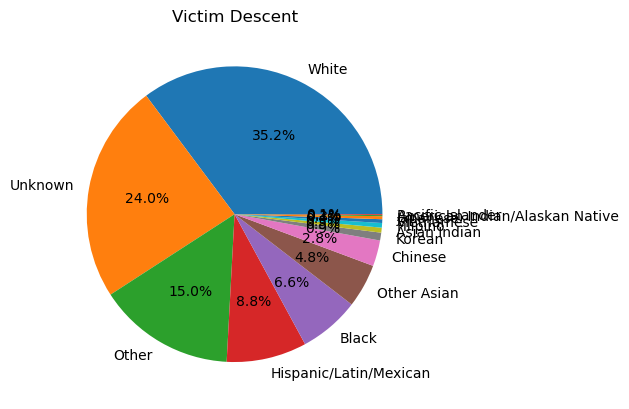

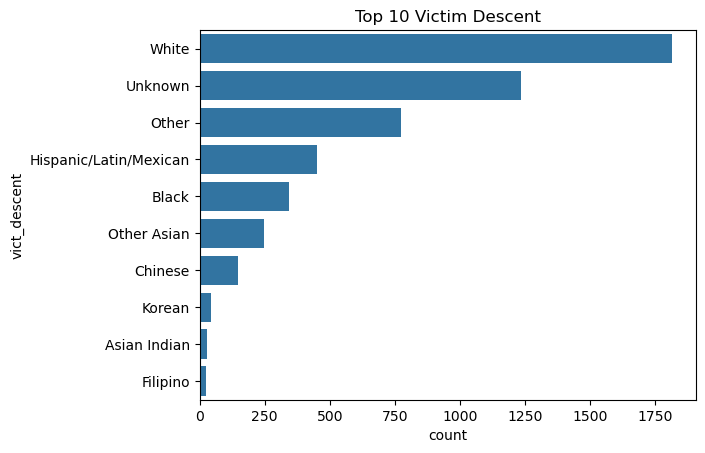

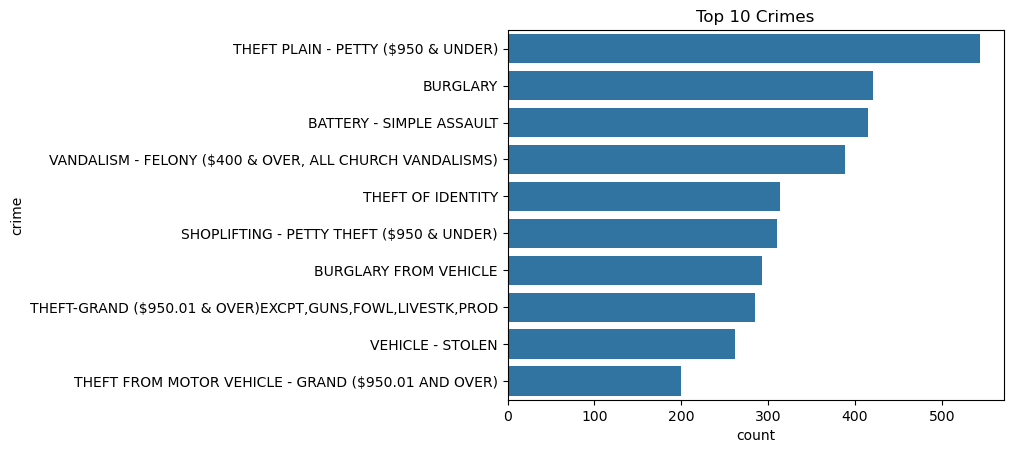

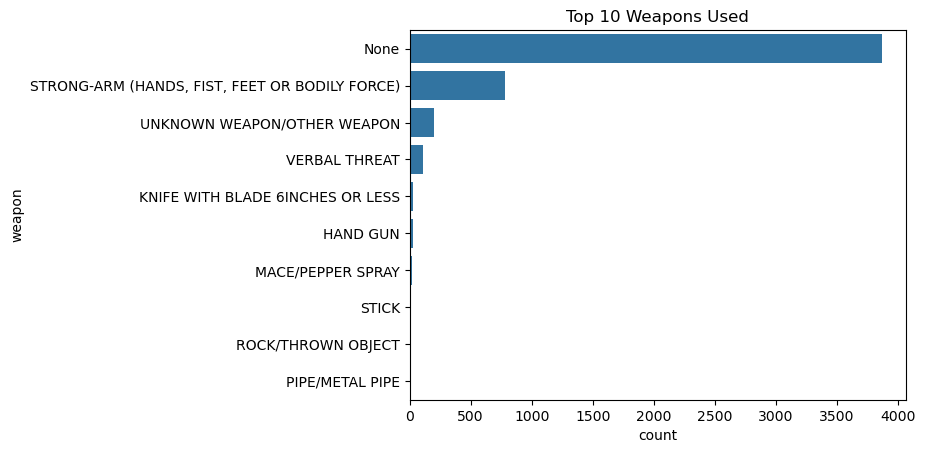

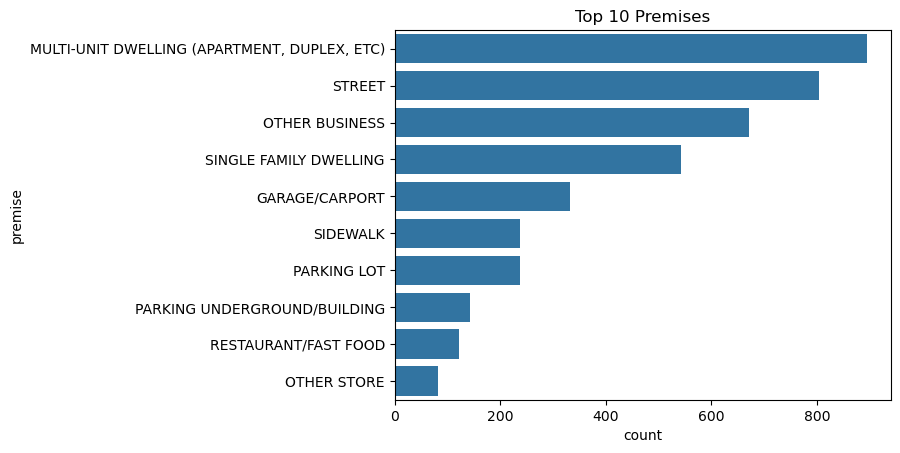

In [21]:
df2 = df['vict_sex'].value_counts()
plt.pie(df2.values, labels = df2.index, autopct = '%1.1f%%')
plt.title('Victim Sex')
plt.show()
df2 = df['vict_descent'].value_counts()
plt.pie(df2.values, labels = df2.index, autopct = '%1.1f%%')
plt.title('Victim Descent')
plt.show()
sns.barplot(df2.head(10), orient = 'h')
plt.title('Top 10 Victim Descent')
plt.show()
df2 = df['crime'].value_counts().head(10)
sns.barplot(df2, orient = 'h')
plt.title('Top 10 Crimes')
plt.show()
df2 = df['weapon'].value_counts().head(10)
sns.barplot(df2, orient = 'h')
plt.title('Top 10 Weapons Used')
plt.show()
df2 = df['premise'].value_counts().head(10)
sns.barplot(df2, orient = 'h')
plt.title('Top 10 Premises')
plt.show()

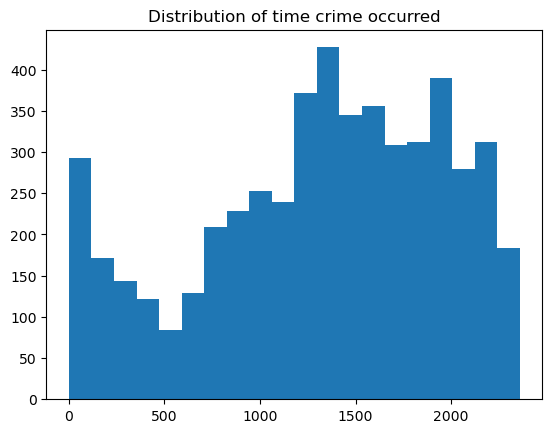

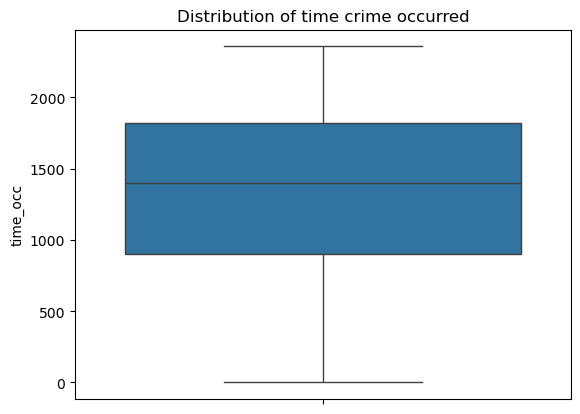

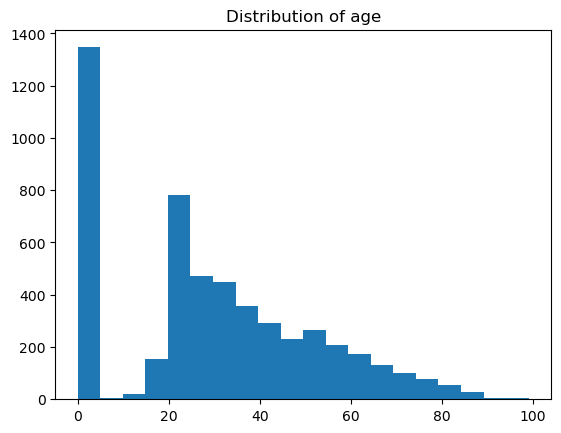

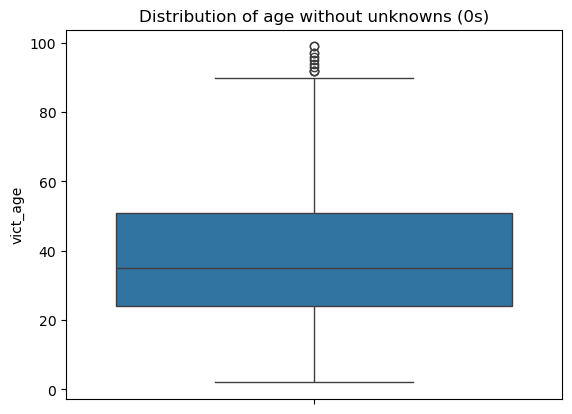

In [12]:
plt.hist(df['time_occ'], bins = 20)
plt.title('Distribution of time crime occurred')
plt.show()
sns.boxplot(y = df['time_occ'])
plt.title('Distribution of time crime occurred')
plt.show()
df.loc[df['vict_age'] == -1, 'vict_age'] = 0
plt.hist(df['vict_age'], bins = 20)
plt.title('Distribution of age')
plt.show()
df2 = df[df['vict_age'] != 0] 
sns.boxplot(y = df2['vict_age'])
plt.title('Distribution of age without unknowns (0s)')
plt.show()

In [33]:
df2 = df.loc[df['vict_age'] >= 18]
df2 = df2.loc[df['vict_age'] <= 22]
df2.shape

(685, 17)

In [13]:
df['time_occ_formatted'] = df['time_occ'].astype(str).str.zfill(4)
df['time_occ_formatted'] = df['time_occ_formatted'].apply(lambda x: x[:2] + ':' + x[2:])
df.head()

,date_rptd,date_occ,time_occ,crime,vict_age,vict_sex,vict_descent,premise,weapon,crime_code,location,lat,lon,time_occ_formatted
1951,2021-01-03,2020-12-04,1422,THEFT PLAIN - PETTY ($950 & UNDER),47,F,White,CONDOMINIUM/TOWNHOUSE,None,440.0,1600 MALCOLM AV,34.0520,-118.4371,14:22
4872,2021-01-17,2020-12-03,1000,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",27,M,White,CONDOMINIUM/TOWNHOUSE,None,341.0,1300 MIDVALE AV,34.0557,-118.4440,10:00
5124,2021-01-07,2020-11-22,500,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",19,M,White,GARAGE/CARPORT,None,341.0,600 KELTON AV,34.0642,-118.4527,05:00
7222,2023-07-22,2020-10-01,1755,THEFT OF IDENTITY,25,F,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,354.0,800 HILGARD AV,34.0664,-118.4397,17:55
11146,2021-01-11,2020-12-28,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",26,F,Other,PARKING UNDERGROUND/BUILDING,None,740.0,10800 WEYBURN AV,34.0623,-118.4434,18:00


,date_rptd,date_occ,time_occ,crime,vict_age,vict_sex,vict_descent,premise,weapon,crime_code,location,lat,lon,time_occ_formatted,time_chunk
1951,2021-01-03,2020-12-04,1422,THEFT PLAIN - PETTY ($950 & UNDER),47,F,White,CONDOMINIUM/TOWNHOUSE,None,440.0,1600 MALCOLM AV,34.0520,-118.4371,14:22,afternoon
4872,2021-01-17,2020-12-03,1000,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",27,M,White,CONDOMINIUM/TOWNHOUSE,None,341.0,1300 MIDVALE AV,34.0557,-118.4440,10:00,day
5124,2021-01-07,2020-11-22,500,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",19,M,White,GARAGE/CARPORT,None,341.0,600 KELTON AV,34.0642,-118.4527,05:00,night
7222,2023-07-22,2020-10-01,1755,THEFT OF IDENTITY,25,F,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",None,354.0,800 HILGARD AV,34.0664,-118.4397,17:55,afternoon
11146,2021-01-11,2020-12-28,1800,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",26,F,Other,PARKING UNDERGROUND/BUILDING,None,740.0,10800 WEYBURN AV,34.0623,-118.4434,18:00,afternoon


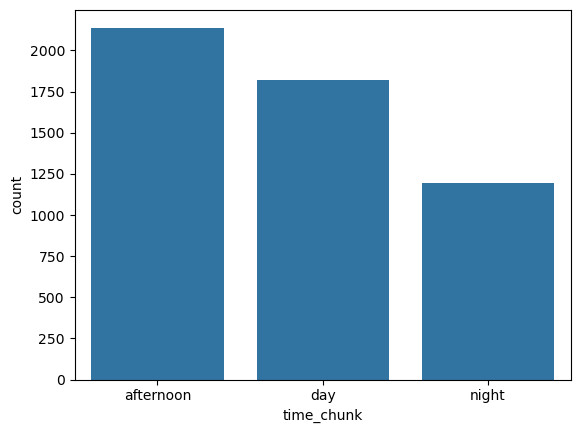

In [14]:
def func(row):
    if row['time_occ'] >= 600 and row['time_occ'] <= 1400:
        return 'day'
    elif row['time_occ'] > 1400 and row['time_occ'] < 2200:
        return 'afternoon' 
    else:
        return 'night'

df['time_chunk'] = df.apply(func, axis=1)
time = df['time_chunk'].value_counts()
sns.barplot(time)
df.head()

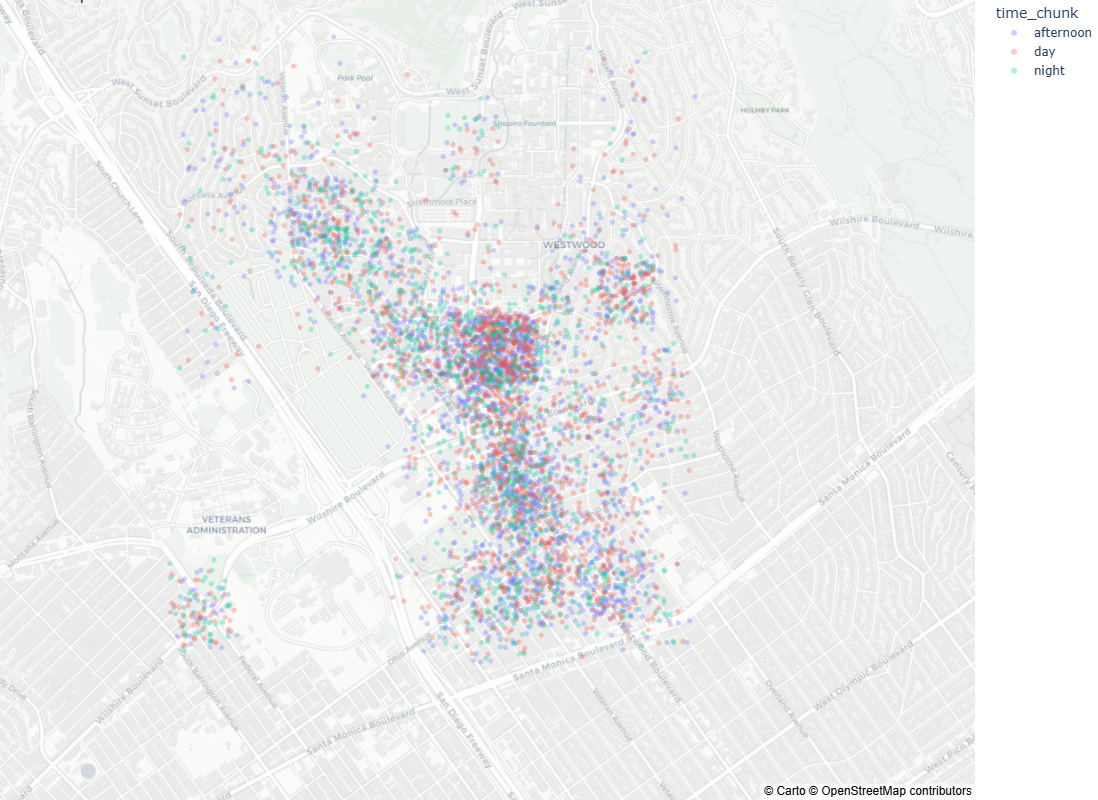

In [34]:
np.random.seed(234)
df['lat_jittered'] = df['lat'] + np.random.uniform(-0.0015, 0.0015, len(df))
df['lon_jittered'] = df['lon'] + np.random.uniform(-0.0015, 0.0015, len(df))

fig = px.scatter_mapbox(df, 
                        lat="lat_jittered", 
                        lon="lon_jittered", 
                        zoom=13.7, 
                        hover_name = 'crime',
                        color = "time_chunk",
                        hover_data = ["time_occ_formatted", 'vict_age'],
                        opacity = 0.3,
                        height=800,
                        width=1200,
                        title = 'Map of Crimes Committed in Westwood'
                       )

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()